In [5]:
import pmoired;

In [31]:
import numpy as np
import matplotlib.pyplot as plt
import time, os, pickle
%matplotlib inline

In [20]:
import pandas

In [21]:
directory = '.'
files = [os.path.join(directory, f) for f in os.listdir(directory) if f.endswith('.fits')]
# -- load only spectrograph
oi = pmoired.OI(files)

loadOI: loading ./2019-07-09_SCI_HD163296_oidataCalibrated.fits
  > insname: "PIONIER_Pnat(1.5330000/1.7730000)" targname: "HD163296" pipeline: ""
  > MJD: (3,) [ 58674.13489239432 .. 58674.28811922153 ]
  > D0-G2-J3-K0 | WL: (6,) [ 1.533 .. 1.773 ] um (R~34) {'T3': 4, 'VIS': 6, 'VIS2': 6} | TELL: False 
loadOI: loading ./2019-07-29_SCI_HD163296_oidataCalibrated.fits
  > insname: "PIONIER_Pnat(1.5330000/1.7730000)" targname: "HD163296" pipeline: ""
  > MJD: (1,) [ 58693.96803035808 .. 58693.96803035808 ]
  > A0-B2-C1-D0 | WL: (6,) [ 1.533 .. 1.773 ] um (R~34) {'T3': 4, 'VIS': 6, 'VIS2': 6} | TELL: False 
loadOI: loading ./2019-07-19_SCI_HD163296_oidataCalibrated.fits
  > insname: "PIONIER_Pnat(1.5156265/1.7599187)" targname: "HD163296" pipeline: ""
  > MJD: (4,) [ 58684.07508086778 .. 58684.15922735762 ]
  > A0-G1-J2-J3 | WL: (6,) [ 1.516 .. 1.76 ] um (R~34) {'T3': 4, 'VIS': 6, 'VIS2': 6} | TELL: False 


In [22]:
ls

2019-07-09_SCI_HD163296_oidataCalibrated.fits
2019-07-19_SCI_HD163296_oidataCalibrated.fits
2019-07-29_SCI_HD163296_oidataCalibrated.fits
Untitled.ipynb


[dpfit] 5 FITTED parameters: ['resolved,az amp1', 'resolved,az projang1', 'resolved,diamin', 'resolved,diamout', 'resolved,f0']
[dpfit] epsfcn= 1e-08 ftol= 1e-05
[dpfit] using scipy.optimize.leastsq
[dpfit] Tue Oct 18 15:38:09 2022 001/000 CHI2: 3.8824e+02|
[dpfit] Both actual and predicted relative reductions in the sum of squares  are at most 0.000010
[dpfit] 60 function calls ( 16.01 ms on average)
# -- degrees of freedom: 484
# -- reduced chi2: 67.82392811874577
{'resolved,az amp1':    0.193, # +/- 0.022
'resolved,az projang1':-120.9, # +/- 10.9
'resolved,diamin':     1.24, # +/- 0.68
'resolved,diamout':    7.008, # +/- 0.082
'resolved,f0':         2.11, # +/- 0.34
'compact,f0':          1.0,
'compact,ud':          0.05,
'resolved,incl':       44.55,
'resolved,profile':    '$R**-.5',
'resolved,projang':    -18.5,
'resolved,x':          0,
'resolved,y':          0,
}

Correlations (%)  >=90 >=80 >=70 >=50 >=20 <20%
                         0   1   2   3   4  
 0:    resolved,az amp1

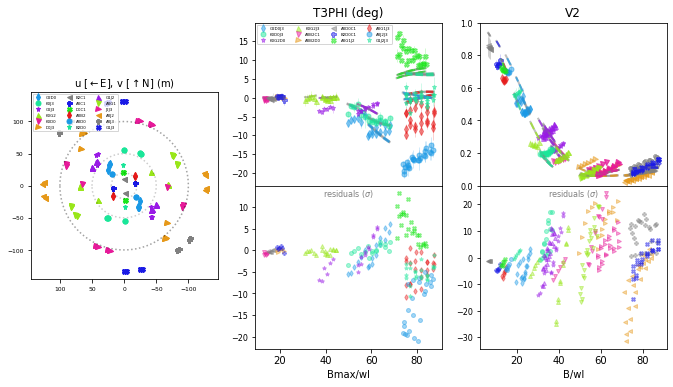

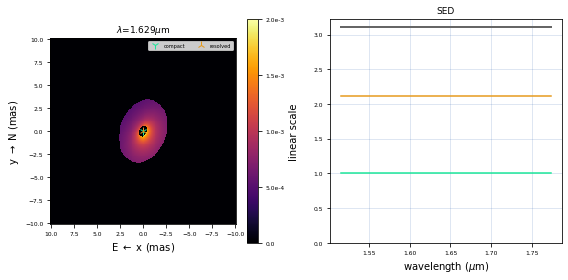

In [109]:
# -- set the context for the fit
fit = {
    # -- observable to fit
    'obs': ['V2','T3PHI'],
    # -- wavelength range: bluest part is noisy
 #   'wl ranges':[(2.05, 2.5)],
    # -- minimum error, override the errors in data file if it is smaller
    'min error': {'T3PHI':0.5},
#    'min relative error':{'|V|':0.01},
}

oi.setupFit(fit)

# -- first guess for the model
param = {'compact,f0':   1.0, # flux of compact component
         'compact,ud':   0.05, # uniform disk diameter (mas)
         'resolved,f0':   2,  # resolved component flux
#         'resolved,F0':   0.05,  # resolved component flux

#         'resolved,F2':   0.5, # resolved component flux in (lambda-min(lambda))**2
#         'resolved,spectrum': '$F0 + $F2*($WL-2.0)**2',
#         'resolved,fwhm': 5.0,  # resolved component has a gaussian profile, this is its full width half maximum (mas)
         'resolved,x':    0, # offset to E (mas)
         'resolved,y':    0, # offset to N (mas)
         'resolved,diamin': 0.2,
         'resolved,diamout': 6,
         'resolved,profile':'$R**-.5',
#         'resolved,GP':0.8,
         'resolved,projang':-18.5,
         'resolved,incl':44.55,
         'resolved,az projang1':10,
         'resolved,az amp1':0.5

        }
doNotFit = ['compact,f0','compact,ud','resolved,x','resolved,y','resolved,incl','resolved,projang']

# -- using 'merged' because computations are faster:
oi.doFit(param, doNotFit=doNotFit)
# -- using 'data' will show each file separatly
oi.show(allInOne=1, imFov=20, imPix=0.1, imMax=0.002)

In [110]:
oi.bootstrapFit(Nfits=200)

Tue Oct 18 15:39:05 2022: running 200 fits on 4 processes
  one fit takes ~2.38s [~25.2 fit/minutes]
Tue Oct 18 15:39:15 2022: approx 7.8min remaining
Tue Oct 18 15:40:41 2022: it took 95.2s, 0.48s per fit on average [126.0 fit/minutes]
using 200 fits out of 200 (sigma clipping 4.50)
{'compact,f0'          :1.0 ,
'compact,ud'          :0.05 ,
'resolved,az amp1'    : 0.194, # +/- 0.017
'resolved,az projang1': -122, # +/- 12
'resolved,diamin'     : 1.11, # +/- 0.77
'resolved,diamout'    : 6.99, # +/- 0.15
'resolved,f0'         : 2.16, # +/- 0.32
'resolved,incl'       :44.55 ,
'resolved,profile'    :'$R**-.5',
'resolved,projang'    :-18.5 ,
'resolved,x'          :0 ,
'resolved,y'          :0 ,
}
Correlations (%)  >=90 >=80 >=70 >=50 >=20 <20%
                         0   1   2   3   4  
 0:    resolved,az amp1 ###  10 -42  12  42   8 
 1:resolved,az projang1  10 ###   8   3 -11 -12 
 2:     resolved,diamin -42   8 ### -71 -98  13 
 3:    resolved,diamout  12   3 -71 ###  62 -28 
 4:      

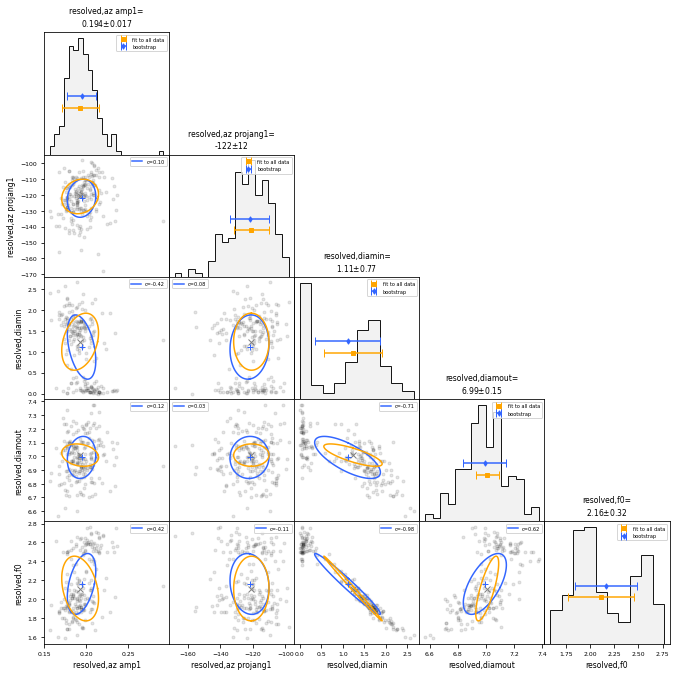

In [111]:
oi.showBootstrap()

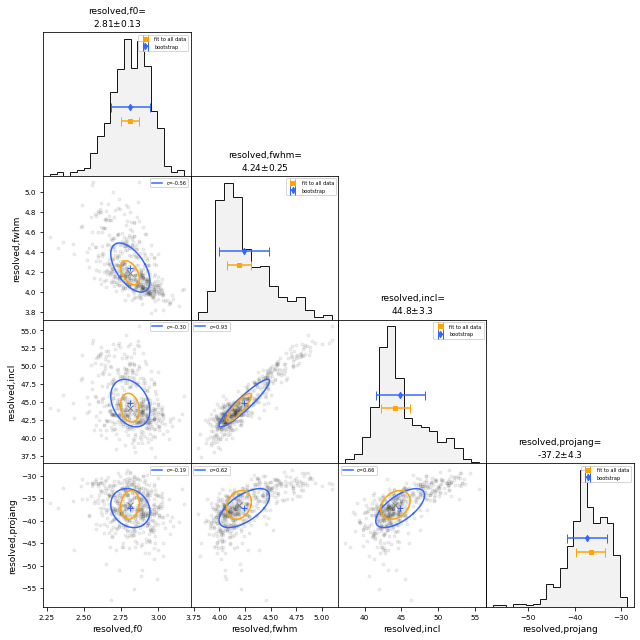

In [47]:
oi.showBootstrap()


[dpfit] 4 FITTED parameters: ['resolved,F0', 'resolved,F2', 'resolved,az amp1', 'resolved,az projang1']
[dpfit] epsfcn= 1e-08 ftol= 1e-05
[dpfit] using scipy.optimize.leastsq
[dpfit] Tue Oct 18 15:07:24 2022 001/000 CHI2: 3.0685e+04|
[dpfit] Both actual and predicted relative reductions in the sum of squares  are at most 0.000010
[dpfit] 36 function calls ( 4.299 ms on average)
[dpfit] WARNING: singular covariance matrix, uncertainties cannot be computed
[dpfit]          parameter "resolved,az amp1" does not change CHI2: IT CANNOT BE FITTED
[dpfit]          parameter "resolved,az projang1" does not change CHI2: IT CANNOT BE FITTED
[dpfit] Parameters ['resolved,F0', 'resolved,F2'] may not be converging properly
[dpfit] check with "showFit" (too sensitive to relative variations?)
# -- degrees of freedom: 483
# -- reduced chi2: 56.5327681593181
{'resolved,F0':         3.8128122502157025,
'resolved,F2':         -8.990908964004209,
'resolved,az amp1':    1.0,
'resolved,az projang1':15.0,
'c

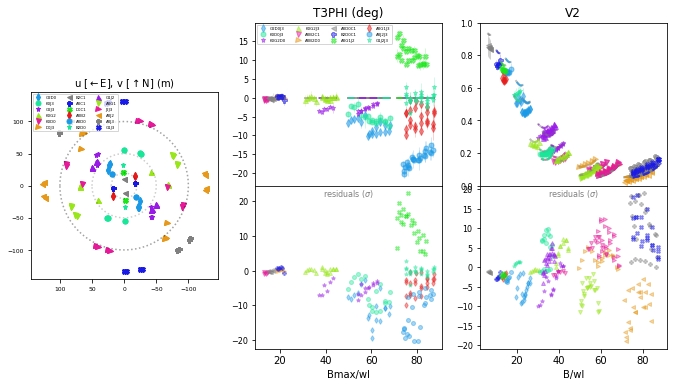

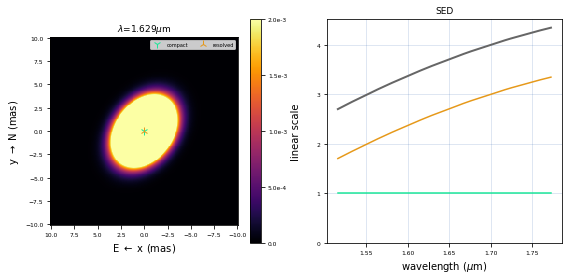

In [75]:
# -- set the context for the fit
fit = {
    # -- observable to fit
    'obs': ['V2','T3PHI'],
    # -- wavelength range: bluest part is noisy
 #   'wl ranges':[(2.05, 2.5)],
    # -- minimum error, override the errors in data file if it is smaller
    'min error': {'T3PHI':0.5},
#    'min relative error':{'|V|':0.01},
}

oi.setupFit(fit)

# -- first guess for the model

#'resolved,f0':     2.811, # +/- 0.063
#'resolved,fwhm':   4.19, # +/- 0.12
#'resolved,incl':   44.18, # +/- 2.00
#'resolved,projang':-36.51, # +/- 3.19

param = {'compact,f0':   1.0, # flux of compact component
         'compact,ud':   .5, # uniform disk diameter (mas)
#         'resolved,f0':   2.811,  # resolved component flux
         'resolved,F0':   0.05,  # resolved component flux

         'resolved,F2':   0.5, # resolved component flux in (lambda-min(lambda))**2
         'resolved,spectrum': '$F0 + $F2*($WL-2.0)**2',
         'resolved,fwhm': 4.19,  # resolved component has a gaussian profile, this is its full width half maximum (mas)
         'resolved,x':    0, # offset to E (mas)
         'resolved,y':    0, # offset to N (mas)
#         'resolved,diamin': 1,
#         'resolved,diamout': 6,
#         'resolved,profile':'$R**0.5',
#         'resolved,GP':0.8,
         'resolved,az amp1':1,
         'resolved,az projang1':15,
         'resolved,projang':-36.51,
         'resolved,incl':44


        }
doNotFit = ['compact,f0','resolved,x','resolved,y','compact,ud','resolved,f0','resolved,fwhm','resolved,incl','resolved,projang']

# -- using 'merged' because computations are faster:
oi.doFit(param, doNotFit=doNotFit)
# -- using 'data' will show each file separatly
oi.show(allInOne=1, imFov=20, imPix=0.1, imMax=0.002)